<a href="https://colab.research.google.com/github/Anirudh-2712/Exploratory-Data-analysis/blob/main/Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crime Data Analysis (module 3)

### Anirudh Agrawal
### 22BCE2191
### C2 slot



importing libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Load the dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Crime.csv')

print("First 5 rows of the dataset:")
print(df.head())

print("\nDimensions of the dataset:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\nSummary of the dataset:")
print(df.describe())

print("\nMissing values in the dataset:")
print(df.isnull().sum())

First 5 rows of the dataset:
   rownames  county  year    crmrte    prbarr   prbconv   prbpris  avgsen  \
0         1       1    81  0.039885  0.289696  0.402062  0.472222    5.61   
1         2       1    82  0.038345  0.338111  0.433005  0.506993    5.59   
2         3       1    83  0.030305  0.330449  0.525703  0.479705    5.80   
3         4       1    84  0.034726  0.362525  0.604706  0.520104    6.89   
4         5       1    85  0.036573  0.325395  0.578723  0.497059    6.55   

      polpc   density  ...     lwfir     lwser     lwmfg     lwfed     lwsta  \
0  0.001787  2.307159  ...  5.607452  5.374044  5.434246  6.014619  5.464848   
1  0.001767  2.330254  ...  5.706707  5.444911  5.482013  6.039540  5.536862   
2  0.001836  2.341801  ...  5.736475  5.481292  5.597310  6.084157  5.522900   
3  0.001886  2.346420  ...  5.858180  5.531204  5.640985  6.129421  5.568077   
4  0.001924  2.364896  ...  5.948220  5.564850  5.700042  6.195282  5.639919   

      lwloc  lpctymle   lpc

# Handling missing data

Fill missing values

In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after filling:")
print(df.isnull().sum())


Missing values after filling:
rownames    0
county      0
year        0
crmrte      0
prbarr      0
prbconv     0
prbpris     0
avgsen      0
polpc       0
density     0
taxpc       0
region      0
smsa        0
pctmin      0
wcon        0
wtuc        0
wtrd        0
wfir        0
wser        0
wmfg        0
wfed        0
wsta        0
wloc        0
mix         0
pctymle     0
lcrmrte     0
lprbarr     0
lprbconv    0
lprbpris    0
lavgsen     0
lpolpc      0
ldensity    0
lwcon       0
lwtuc       0
lwtrd       0
lwfir       0
lwser       0
lwmfg       0
lwfed       0
lwsta       0
lwloc       0
lpctymle    0
lpctmin     0
ltaxpc      0
lmix        0
dtype: int64


# Univariate Analysis


Measures of central tendencies of Crime rate (crmrte) column

In [5]:
mean = df["crmrte"].mean()
median =df["crmrte"].median()
mode = df["crmrte"].mode()
print(mean , median, mode)

0.0315875926984127 0.0284406 0    0.026871
Name: crmrte, dtype: float64


univariate analysis of crime rate

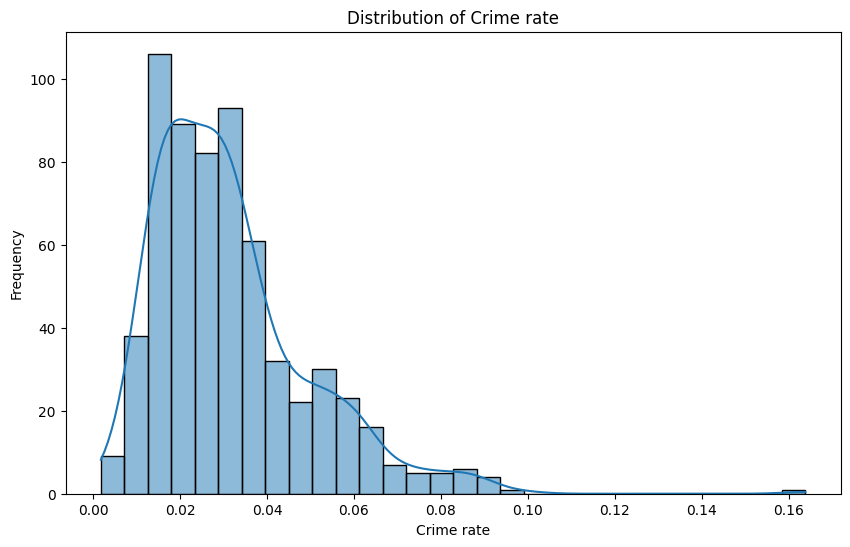

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['crmrte'], bins=30, kde=True)
plt.title('Distribution of Crime rate')
plt.xlabel('Crime rate')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


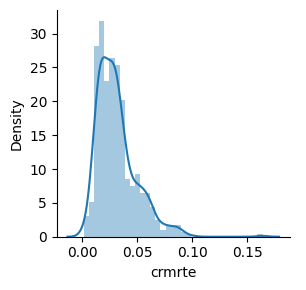

In [8]:
sns.FacetGrid(df).map(sns.distplot,"crmrte").add_legend()

# Bivariate analysis

Scatter plot for Crime Rate vs Probability of Arrest

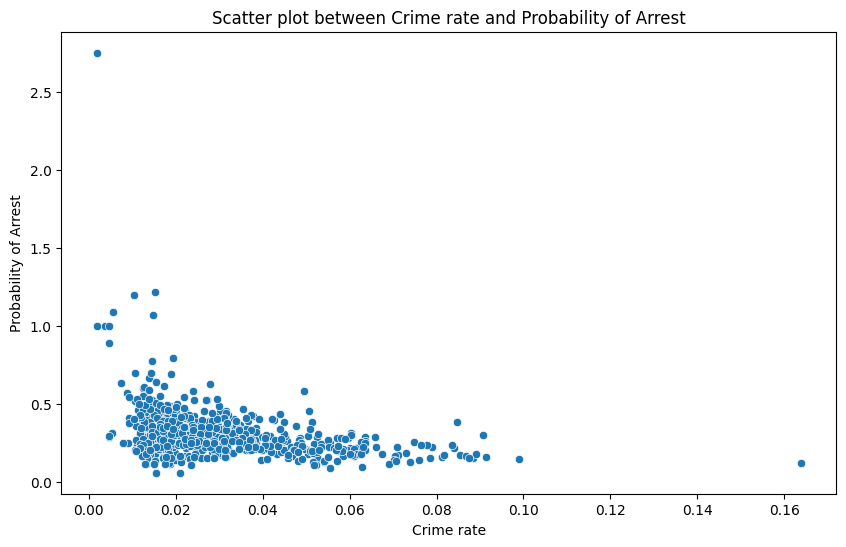

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='crmrte', y='prbarr')
plt.title('Scatter plot between Crime rate and Probability of Arrest')
plt.xlabel('Crime rate')
plt.ylabel('Probability of Arrest')
plt.show()

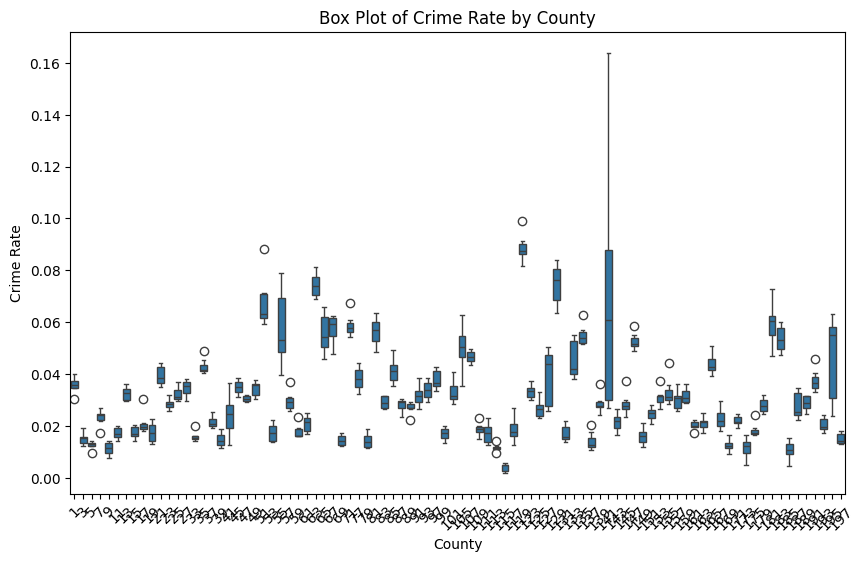

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='county', y='crmrte', data=df)
plt.title('Box Plot of Crime Rate by County')
plt.xlabel('County')
plt.ylabel('Crime Rate')
plt.xticks(rotation=45)
plt.show()

# Multivariate Analysis


Pair plot for Crime Rate, Probability of Arrest, Average Sentence

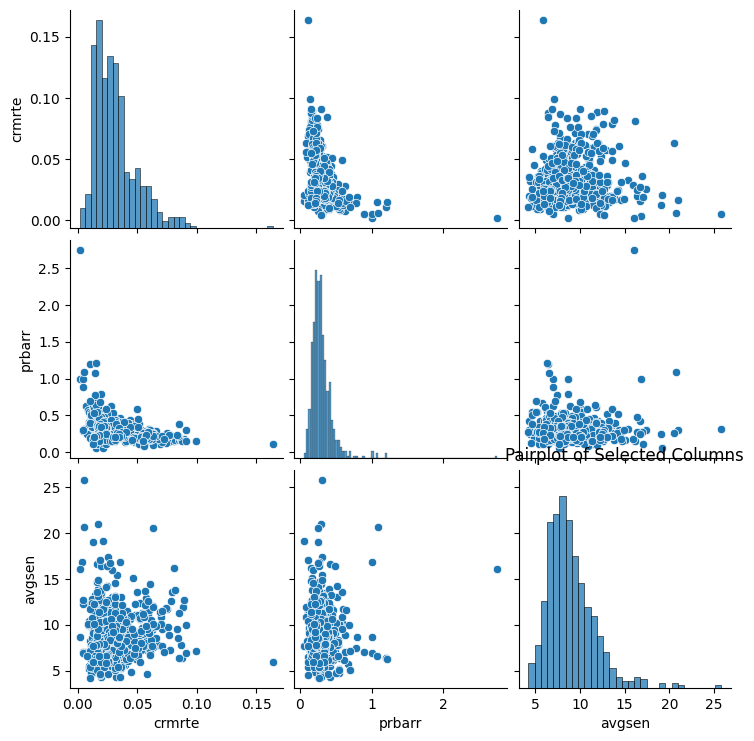

In [ ]:
sns.pairplot(df[['crmrte', 'prbarr', 'avgsen']])
plt.title('Pairplot of Selected Columns')
plt.show()

Correlation between rownames and county:
p-value:	 0.0
cor:		 0.9994802908129659


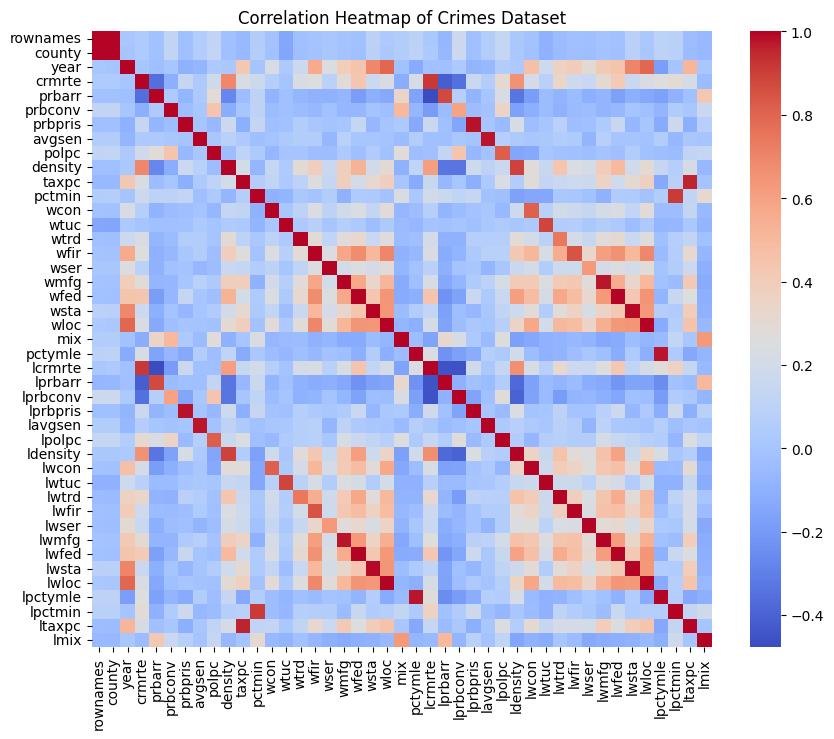

In [18]:
numerical_df = df.select_dtypes(include='number')

# Step 1: Calculate the Pearson correlation for the first two numerical columns as an example
if numerical_df.shape[1] >= 2:
    first_col = numerical_df.columns[0]
    second_col = numerical_df.columns[1]

    corr = stats.pearsonr(numerical_df[first_col], numerical_df[second_col])
    print(f"Correlation between {first_col} and {second_col}:")
    print("p-value:\t", corr[1])
    print("cor:\t\t", corr[0])
else:
    print("Not enough numerical columns to calculate correlation.")

# Step 2: Visualize the correlation matrix using a heatmap
correlation = numerical_df.corr(method='pearson')

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm',
            xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.title('Correlation Heatmap of Crimes Dataset')
plt.show()